In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import seaborn as sns

In [4]:
df = pd.read_csv('E:/Carrera en datos/Tableros de práctica/1-Life Expectancy/Life Expectancy Data.csv')
pd.set_option('display.max_colwidth', None)

#### Exploratory analysis

In [6]:
df.head()

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


In [59]:
print('\nShape')
print(df.shape)
print('\nInfo')
print(df.info())
print('\nDescribe')
print(df.describe())


Shape
(2888, 22)

Info
<class 'pandas.core.frame.DataFrame'>
Index: 2888 entries, 15 to 2922
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Country                          2888 non-null   object 
 1   Year                             2888 non-null   int64  
 2   Status                           2888 non-null   object 
 3   Life expectancy                  2888 non-null   float64
 4   Adult Mortality                  2888 non-null   float64
 5   infant deaths                    2888 non-null   int64  
 6   Alcohol                          2888 non-null   float64
 7   percentage expenditure           2888 non-null   float64
 8   Hepatitis B                      2888 non-null   float64
 9   Measles                          2888 non-null   int64  
 10  BMI                              2888 non-null   float64
 11  under-five deaths                2888 non-null   int64  
 12  

In [8]:
#there are some spaces in the column names
df.columns = df.columns.str.strip()

In [9]:
print(df.isna().sum())

Country                              0
Year                                 0
Status                               0
Life expectancy                     10
Adult Mortality                     10
infant deaths                        0
Alcohol                            194
percentage expenditure               0
Hepatitis B                        553
Measles                              0
BMI                                 34
under-five deaths                    0
Polio                               19
Total expenditure                  226
Diphtheria                          19
HIV/AIDS                             0
GDP                                448
Population                         652
thinness  1-19 years                34
thinness 5-9 years                  34
Income composition of resources    167
Schooling                          163
dtype: int64


In [10]:
#We consider eliminating nulls less than 5%

In [11]:
df_len = len(df)*0.05
df_null_less_5 = df.columns[(df.isna().sum()>0) & (df.isna().sum() <= df_len)]
df_null_less_5

Index(['Life expectancy', 'Adult Mortality', 'BMI', 'Polio', 'Diphtheria',
       'thinness  1-19 years', 'thinness 5-9 years'],
      dtype='object')

In [12]:
df.dropna(subset = df_null_less_5, inplace = True)

In [13]:
print(df.isna().sum())

Country                              0
Year                                 0
Status                               0
Life expectancy                      0
Adult Mortality                      0
infant deaths                        0
Alcohol                            175
percentage expenditure               0
Hepatitis B                        525
Measles                              0
BMI                                  0
under-five deaths                    0
Polio                                0
Total expenditure                  212
Diphtheria                           0
HIV/AIDS                             0
GDP                                435
Population                         644
thinness  1-19 years                 0
thinness 5-9 years                   0
Income composition of resources    160
Schooling                          160
dtype: int64


In [14]:
#filling missing values greater than 5% with mean
df_numeric = df.select_dtypes(include='number')
df[df_numeric.columns] = df_numeric.fillna(df_numeric.mean())

In [15]:
print(df.isna().sum())

Country                            0
Year                               0
Status                             0
Life expectancy                    0
Adult Mortality                    0
infant deaths                      0
Alcohol                            0
percentage expenditure             0
Hepatitis B                        0
Measles                            0
BMI                                0
under-five deaths                  0
Polio                              0
Total expenditure                  0
Diphtheria                         0
HIV/AIDS                           0
GDP                                0
Population                         0
thinness  1-19 years               0
thinness 5-9 years                 0
Income composition of resources    0
Schooling                          0
dtype: int64


### Data manipulation

In [17]:
df = df.sort_values(by=['Country', 'Year'])

In [18]:
#TOP 10 COUNTRIES IN THE LAST YEAR (2015)
top_10 = df[['Country','Life expectancy']][df['Year']==df['Year'].max()].sort_values('Life expectancy',ascending=False).head(10)
print(top_10)

          Country  Life expectancy
2345     Slovenia             88.0
737       Denmark             86.0
544         Chile             85.0
673        Cyprus             85.0
1314        Japan             83.7
2521  Switzerland             83.4
2313    Singapore             83.1
112     Australia             82.8
2425        Spain             82.8
1282        Italy             82.7


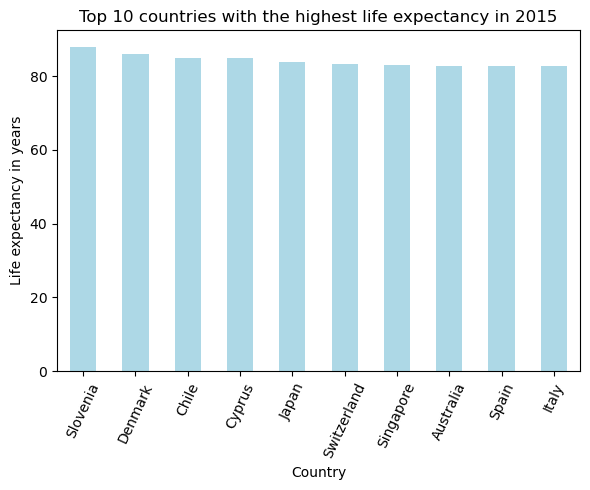

In [19]:
top_10.plot(kind='bar', x='Country', y='Life expectancy', figsize=(6, 5), color='lightblue', legend=False)

plt.title('Top 10 countries with the highest life expectancy in 2015')
plt.ylabel('Life expectancy in years')
plt.xlabel('Country')
plt.xticks(rotation=65)
plt.tight_layout()
plt.show()

In [20]:
#COUNTRIES WITH THE LOWEST LIFE EXPECTANCY IN THE LAST YEAR (2015)
worst_10 = df[['Country','Life expectancy']][df['Year']==df['Year'].max()].sort_values('Life expectancy',ascending=True).head(10)
print(worst_10)

                       Country  Life expectancy
2297              Sierra Leone             51.0
48                      Angola             52.4
512   Central African Republic             52.5
528                       Chad             53.1
432              Côte d'Ivoire             53.3
1474                   Lesotho             53.7
1893                   Nigeria             54.5
2377                   Somalia             55.0
480                   Cameroon             57.3
1764                Mozambique             57.6


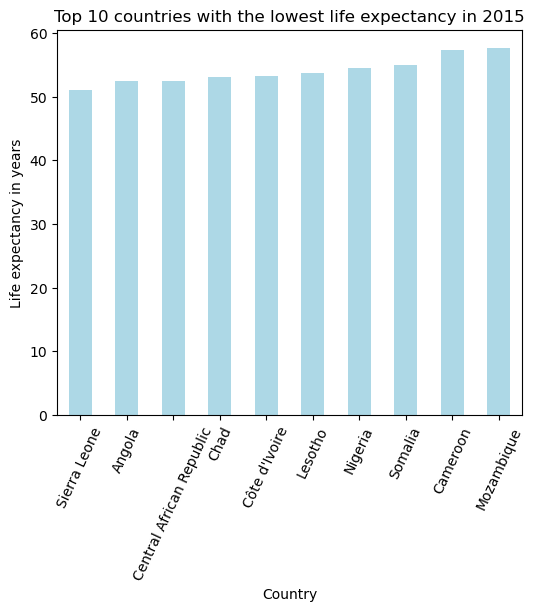

In [21]:
worst_10.plot(kind='bar', x='Country', y='Life expectancy', figsize=(6, 5), color='lightblue', legend=False)
plt.title('Top 10 countries with the lowest life expectancy in 2015')
plt.ylabel('Life expectancy in years')
plt.xlabel('Country')
plt.xticks(rotation=65)
plt.show()

In [22]:
#TOP 10 LIFE EXPECTANCY CHANGE BY COUNTRY IN THE LAST YEAR
life_exp_change = df.groupby('Country')['Life expectancy'].agg(lambda x: x.iloc[-1] - x.iloc[0])

In [23]:
top_10 = life_exp_change.sort_values(ascending = False).head(10)
print(top_10)

Country
Zimbabwe                            21.0
Eritrea                             19.4
Zambia                              18.0
Botswana                            17.9
Rwanda                              17.8
Uganda                              15.7
Malawi                              15.2
Bolivia (Plurinational State of)    14.4
Ethiopia                            13.6
United Republic of Tanzania         12.6
Name: Life expectancy, dtype: float64


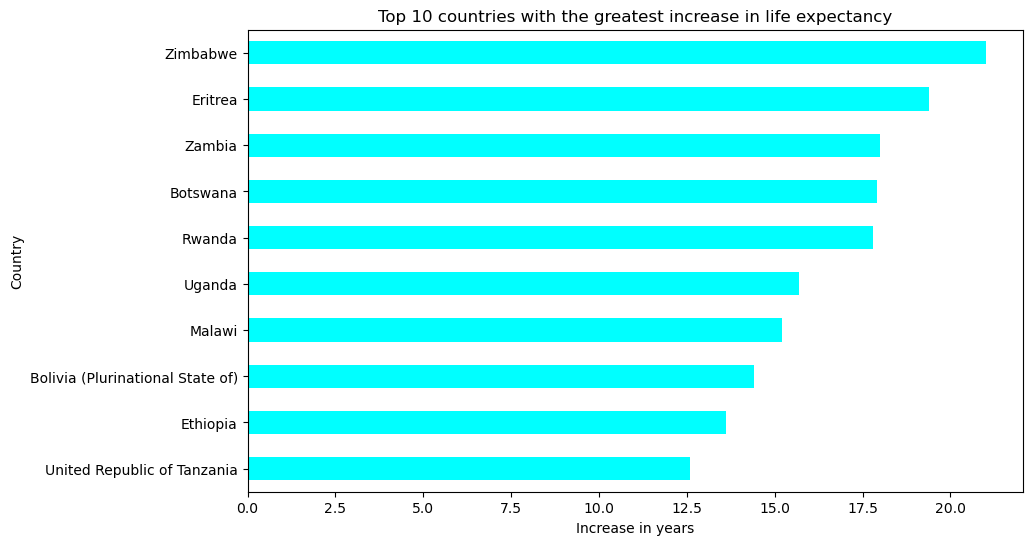

In [24]:
top_10.plot(kind='barh', figsize=(10, 6), title='Top 10 countries with the greatest increase in life expectancy', color='cyan')
plt.xlabel('Increase in years')
plt.gca().invert_yaxis()  # opcional para mostrar el país con más crecimiento arriba
plt.show()

“In the last year of the dataset, the countries with the greatest increase in life expectancy were these 10. This could be related to variables such as spending on health, education, or infant mortality, as reflected in the following correlation heatmap.”

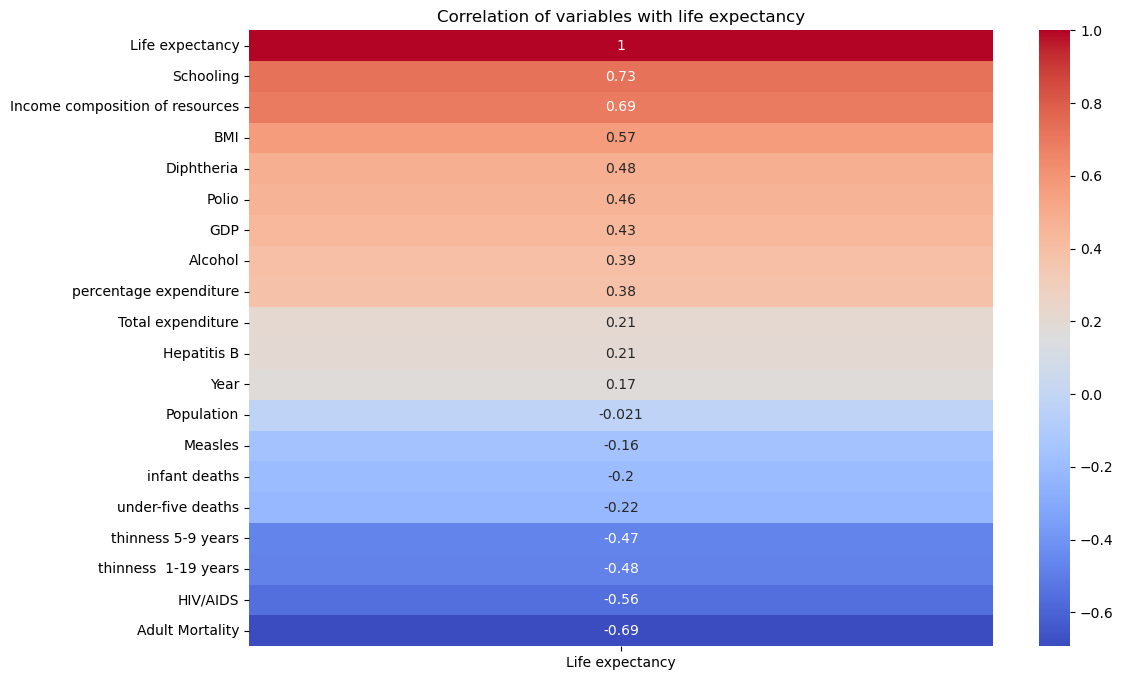

In [26]:
#CORRELATION BETWEEN LIFE EXPECTANCY VS OTHER VARIABLES
df_corr = df.select_dtypes(include='number')
plt.figure(figsize=(12, 8))
sns.heatmap(df_corr.corr()[['Life expectancy']].sort_values(by='Life expectancy', ascending=False), 
            annot=True, cmap='coolwarm')
plt.title('Correlation of variables with life expectancy')
plt.show()

As can be seen, factors such as GDP, income, and education are variables related to life expectancy; on the other hand, adult mortality and HIV are factors that decrease life expectancy.

Now let's analyze how these variables affect countries with the highest and lowest average life expectancies.

In [29]:
df_mean_low = df.groupby('Country').mean(numeric_only=True).sort_values('Life expectancy').head(10)
print(df_mean_low.head(3))

                            Year  Life expectancy  Adult Mortality  \
Country                                                              
Sierra Leone              2007.5         46.11250         357.8125   
Central African Republic  2007.5         48.51250         333.0625   
Lesotho                   2007.5         48.78125         550.0625   

                          infant deaths   Alcohol  percentage expenditure  \
Country                                                                     
Sierra Leone                    27.5625  3.247739               29.105579   
Central African Republic        16.5000  1.444614               40.905543   
Lesotho                          4.5000  2.246489               82.118913   

                          Hepatitis B   Measles       BMI  under-five deaths  \
Country                                                                        
Sierra Leone                82.384628  673.8750  18.30625            41.8750   
Central African Republi

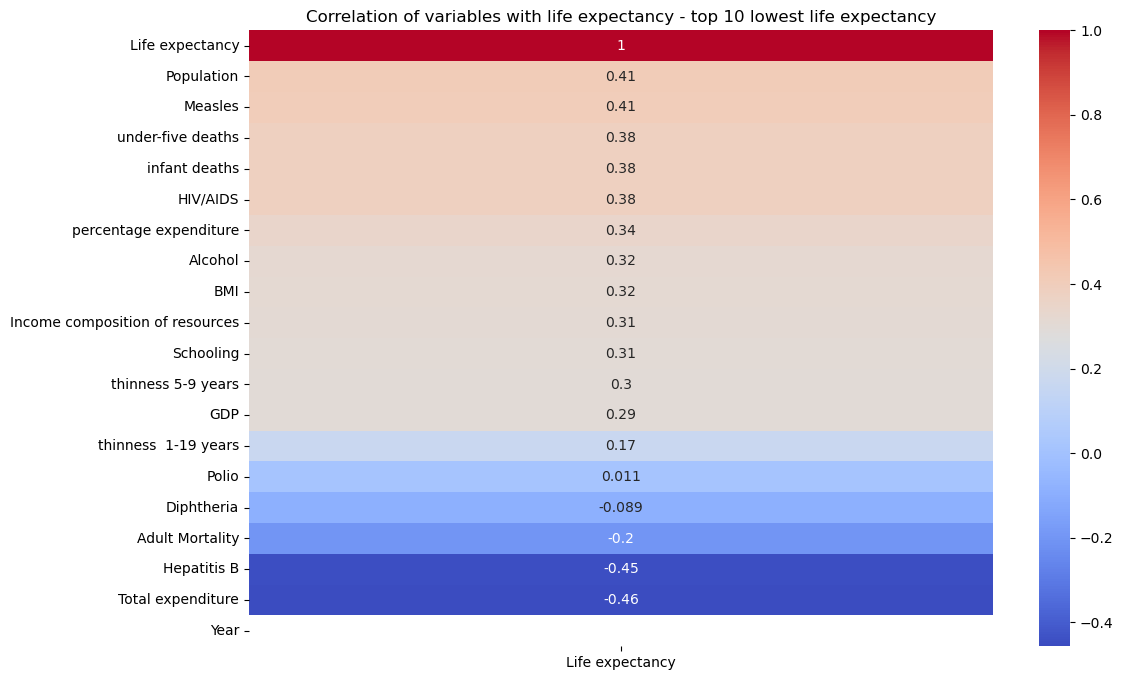

In [30]:
plt.figure(figsize=(12, 8))
sns.heatmap(df_mean_low.corr()[['Life expectancy']].sort_values(by='Life expectancy', ascending=False), 
            annot=True, cmap='coolwarm')
plt.title('Correlation of variables with life expectancy - top 10 lowest life expectancy')
plt.show()

In [31]:
df_mean_high = df.groupby('Country').mean(numeric_only=True).sort_values('Life expectancy',ascending=False).head(10)
print(df_mean_high.head(3))

           Year  Life expectancy  Adult Mortality  infant deaths   Alcohol  \
Country                                                                      
Japan    2007.5         82.53750          57.1250          2.875  6.890864   
Sweden   2007.5         82.51875          59.1875          0.000  6.783989   
Iceland  2007.5         82.44375          49.3750          0.000  7.289614   

         percentage expenditure  Hepatitis B    Measles       BMI  \
Country                                                             
Japan               3923.050329    81.022006  6875.8125  25.60625   
Sweden              4438.163154    74.202629    18.9375  56.25000   
Iceland             4991.595308    81.022006     0.0000  51.07500   

         under-five deaths    Polio  Total expenditure  Diphtheria  HIV/AIDS  \
Country                                                                        
Japan                  4.0  96.0000           6.438852     96.2500       0.1   
Sweden                 

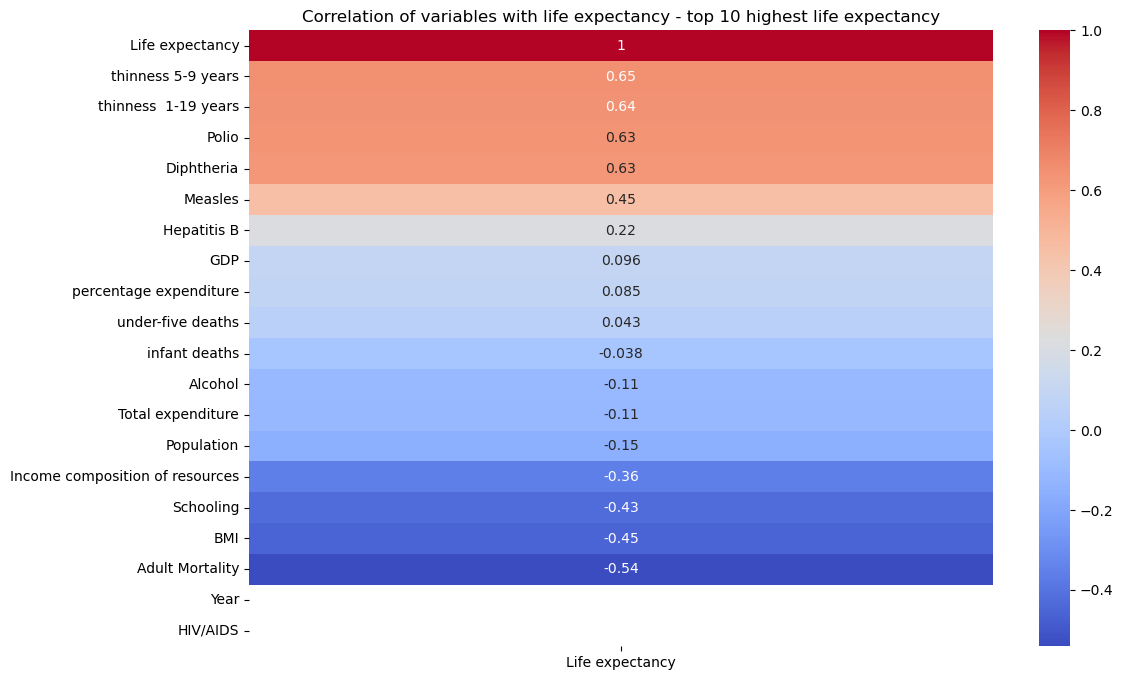

In [32]:
plt.figure(figsize=(12, 8))
sns.heatmap(df_mean_high.corr()[['Life expectancy']].sort_values(by='Life expectancy', ascending=False), 
            annot=True, cmap='coolwarm')
plt.title('Correlation of variables with life expectancy - top 10 highest life expectancy')
plt.show()